In [1]:
!pip install yfinance==0.2.4

In [52]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [53]:
tesla = yf.Ticker("tsla")

In [54]:
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)

In [55]:
tesla_head = tesla_data.head()
tesla_head

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [72]:
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3303,2023-08-14 00:00:00-04:00,235.699997,240.660004,233.750000,239.759995,98595300,0.0,0.0
3304,2023-08-15 00:00:00-04:00,238.729996,240.500000,232.610001,232.960007,88197600,0.0,0.0
3305,2023-08-16 00:00:00-04:00,228.020004,233.970001,225.380005,225.600006,112484500,0.0,0.0
3306,2023-08-17 00:00:00-04:00,226.059998,226.740005,218.830002,219.220001,120718400,0.0,0.0


In [73]:
html = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')
html_data = html.text

In [74]:
soup = BeautifulSoup(html_data,"html.parser")
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables[1]))[0]
tesla_revenue.tail()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


In [80]:
tesla_revenue.dropna(inplace=True)
tesla_revenue["Tesla Quarterly Revenue(Millions of US $).1"] = tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'].str.replace(',|\$',"")
tesla_revenue = tesla_revenue[tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'] != ""]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [81]:
tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'] = pd.to_numeric(tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'])

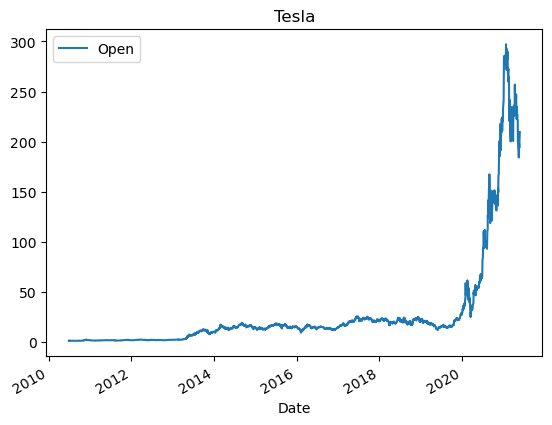

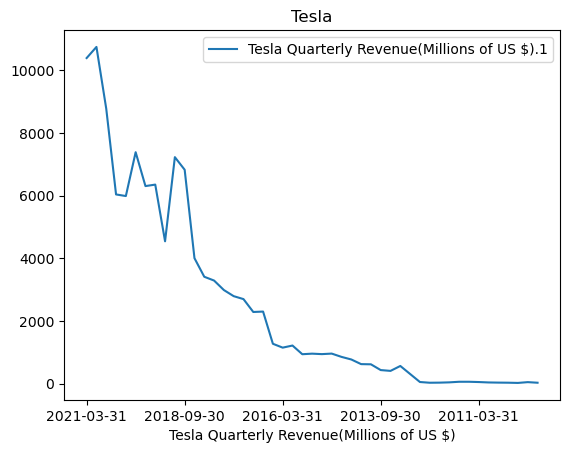

In [82]:
import datetime
def make_graph(tesla_data, tesla_revenue, title):
    df1 = tesla_data.loc[tesla_data['Date'] < str('2021-06-1')]
    df2 = tesla_revenue.loc[tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'] < str('2021-06-1')]
    df1.plot(x="Date", y="Open", title=title)
    df2.plot(x="Tesla Quarterly Revenue(Millions of US $)", y="Tesla Quarterly Revenue(Millions of US $).1", title=title)

make_graph(tesla_data, tesla_revenue, 'Tesla')

In [83]:
gme = yf.Ticker('GME')

In [91]:
gme_data = gme.history(period='max')
gme_data = df.reset_index()
gme_data_head = gme_data.head()
gme_data_head

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [90]:
gme_data

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3303,3303,2023-08-14 00:00:00-04:00,235.699997,240.660004,233.750000,239.759995,98595300,0.0,0.0
3304,3304,2023-08-15 00:00:00-04:00,238.729996,240.500000,232.610001,232.960007,88197600,0.0,0.0
3305,3305,2023-08-16 00:00:00-04:00,228.020004,233.970001,225.380005,225.600006,112484500,0.0,0.0
3306,3306,2023-08-17 00:00:00-04:00,226.059998,226.740005,218.830002,219.220001,120718400,0.0,0.0


In [84]:
html = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html')
html_data = html.text


In [85]:
soup = BeautifulSoup(html_data,"html.parser")
tables = soup.find_all('table')
gme_revenue = pd.read_html(str(tables[1]))[0]
gme_revenue.tail()

,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [86]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['GameStop Quarterly Revenue(Millions of US $).1'] != ""]
gme_revenue["GameStop Quarterly Revenue(Millions of US $).1"] = gme_revenue['GameStop Quarterly Revenue(Millions of US $).1'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [87]:
gme_revenue['GameStop Quarterly Revenue(Millions of US $).1'] = pd.to_numeric(gme_revenue['GameStop Quarterly Revenue(Millions of US $).1'])

In [88]:
def make_graph(gme_data, gme_revenue, title):
    df1 = gme_data.loc[gme_data['Date'] < str('2021-06-1')]
    df2 = gme_revenue.loc[gme_revenue['GameStop Quarterly Revenue(Millions of US $)'] < str('2021-06-1')]
    df1.plot(x="Date", y="Open", title=title)
    df2.plot(x="GameStop Quarterly Revenue(Millions of US $)", y="GameStop Quarterly Revenue(Millions of US $).1", title=title)

make_graph(gme_data, gme_revenue, 'GameStop')

NameError: name 'gme_data' is not defined